# Medical Data Visualizer

Este ejercicio forma parte del curso *Data Analysis with Python* de [freeCodeCamp](https://www.freecodecamp.org/learn/data-analysis-with-python/).

**Consigna.** En este proyecto deberá limpiar, filtrar, transformar y visualizar datos de exámenes médicos utilizando Pandas, Matplotlib y Seaborn.

In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read data
df = pd.read_csv("medical_examination.csv", index_col = "id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 12)

Observamos que el conjunto de datos tiene 70000 filas y 12 columnas. Las variables son edad (días), género, peso (cm),  altura (kg), resultados de análisis clínicos (presión arterial sistólica y diastólica, colesterol, glucosa), estilos de vida (consumo de alcohol y tabaco, actividad física) y presencia/ausencia de enfermedad cardiovascular.

**1. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.**

In [5]:
df["overweight"] = df["overweight"] = np.where(df["weight"] / (df["height"] / 100 ) ** 2 > 25, 1, 0)
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0


**2. Normalize the data by making *0 always good* and *1 always bad*. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.**

In [6]:
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0


**3. Draw Categorical Plot**

##### 3.1. Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [7]:
df_cat = pd.melt(df, id_vars = "cardio", value_vars = ("cholesterol", "gluc", "smoke", "alco", "active", "overweight"))
df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


##### 3.2 Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

In [8]:
df_cat = df_cat.value_counts().reset_index(name = "total")
df_cat.head(10)

,cardio,variable,value,total
0,1,alco,0,33156
1,0,alco,0,33080
2,1,smoke,0,32050
3,0,smoke,0,31781
4,0,gluc,0,30894
5,0,cholesterol,0,29330
6,0,active,1,28643
7,1,gluc,0,28585
8,1,active,1,27618
9,1,overweight,1,24440


##### 3.3. Draw the catplot with 'sns.catplot()'

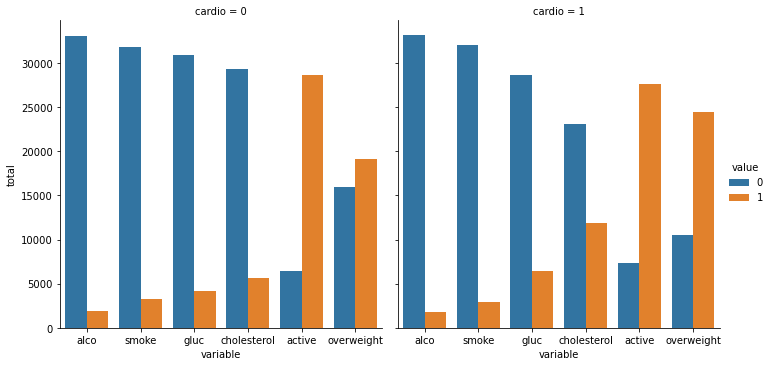

In [9]:
sns.catplot(data = df_cat, x = "variable", y = "total", hue = "value", col = "cardio", kind = "bar")

**4. Draw Heat Map**

##### 4.1. Clean the data. Filter out the following patient segments that represent incorrect data: (a) diastolic pressure is higher than systolic; (b) height is less than the 2.5th percentile; (c) height is more than the 97.5th percentile; (d) weight is less than the 2.5th percentile; (e) weight is more than the 97.5th percentile.

In [10]:
df_heat = df.loc[
        (df["ap_lo"] <= df["ap_hi"]) &
        (df["height"] >= df["height"].quantile(0.025)) &
        (df["height"] <= df["height"].quantile(0.975)) &
        (df["weight"] >= df["weight"].quantile(0.025)) &
        (df["weight"] <= df["weight"].quantile(0.975))]

##### 4.2. Calculate the correlation matrix

In [11]:
corr = df_heat.corr()

##### 4.3. Generate a mask for the upper triangle 

In [12]:
mask = np.triu(np.ones_like(corr, dtype = bool))

##### 4.4. Draw the heatmap with 'sns.heatmap()'

<AxesSubplot:>

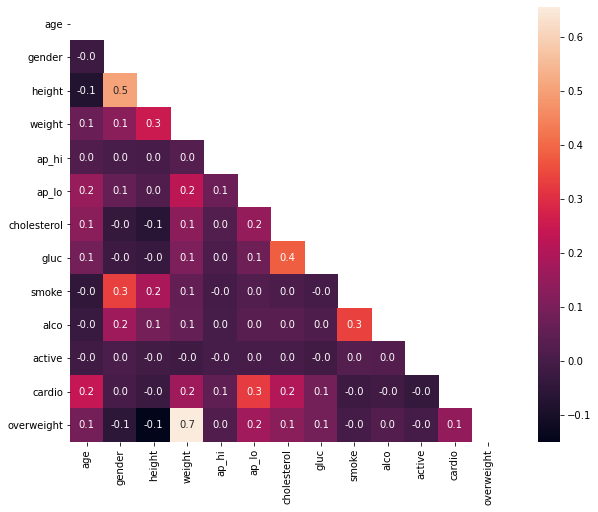

In [13]:
plt.figure(figsize = (12, 8))
sns.heatmap(corr, mask = mask, fmt = ".1f", square = True, annot = True)